# Import

In [16]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
# Load dataset
path = kagglehub.dataset_download("jockeroika/life-style-data")
csv_path = os.path.join(path, os.listdir(path)[0])
df = pd.read_csv(csv_path)

print("Loaded shape:", df.shape)
df.head()

Using Colab cache for faster access to the 'life-style-data' dataset.
Loaded shape: (20000, 54)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [17]:
df.isna().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


## Data cleaning

In [2]:
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
# Numeric → fill with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

print("After cleaning shape:", df.shape)

After cleaning shape: (168, 54)


In [3]:
from sklearn.ensemble import IsolationForest

iso_features = [c for c in num_cols if c in df.columns]  # numeric only

iso = IsolationForest(contamination=0.03, random_state=42)
preds = iso.fit_predict(df[iso_features])

df = df[preds == 1]   # keep only non-outliers

print("After removing outliers:", df.shape)

After removing outliers: (162, 54)


# EDA

In [4]:
# BASIC INFO
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 167
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             162 non-null    float64
 1   Gender                          162 non-null    object 
 2   Weight (kg)                     162 non-null    float64
 3   Height (m)                      162 non-null    float64
 4   Max_BPM                         162 non-null    float64
 5   Avg_BPM                         162 non-null    float64
 6   Resting_BPM                     162 non-null    float64
 7   Session_Duration (hours)        162 non-null    float64
 8   Calories_Burned                 162 non-null    float64
 9   Workout_Type                    162 non-null    object 
 10  Fat_Percentage                  162 non-null    float64
 11  Water_Intake (liters)           162 non-null    float64
 12  Workout_Frequency (days/week)   162 non-n

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
count,162.000000,162,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02,162
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strength,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
freq,NaN,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47
mean,36.984198,NaN,72.663025,1.729877,180.387160,142.042222,60.835556,1.321420,1378.760123,NaN,...,1979.899198,0.500057,1.450287,0.686184,0.790704,616.943580,53.305027,905.900990,8.430436e+19,NaN
std,11.190389,NaN,18.581052,0.127323,10.903407,14.323768,7.392758,0.342579,546.679869,NaN,...,421.384435,0.001418,0.477790,0.141274,0.096919,717.924685,11.502769,257.098547,3.059713e+19,NaN
min,18.000000,NaN,40.940000,1.500000,160.090000,120.140000,49.830000,0.540000,356.080000,NaN,...,1291.410000,0.495986,0.646549,0.394842,0.610218,-997.460000,33.685616,373.010400,1.814092e+17,NaN
25%,28.242500,NaN,57.527500,1.620000,171.372500,129.777500,54.220000,1.105000,998.717500,NaN,...,1650.022500,0.499091,1.120576,0.580902,0.715029,155.085000,44.217203,739.577400,6.610730e+19,NaN
50%,36.955000,NaN,70.740000,1.730000,180.410000,139.880000,60.500000,1.320000,1294.920000,NaN,...,1943.390000,0.500277,1.371925,0.662853,0.768316,534.045000,52.977350,904.373700,8.277908e+19,NaN
75%,45.695000,NaN,85.185000,1.820000,189.682500,155.717500,66.882500,1.515000,1774.815000,NaN,...,2279.690000,0.500927,1.681141,0.782435,0.860266,1122.705000,61.470427,1068.974400,1.038441e+20,NaN


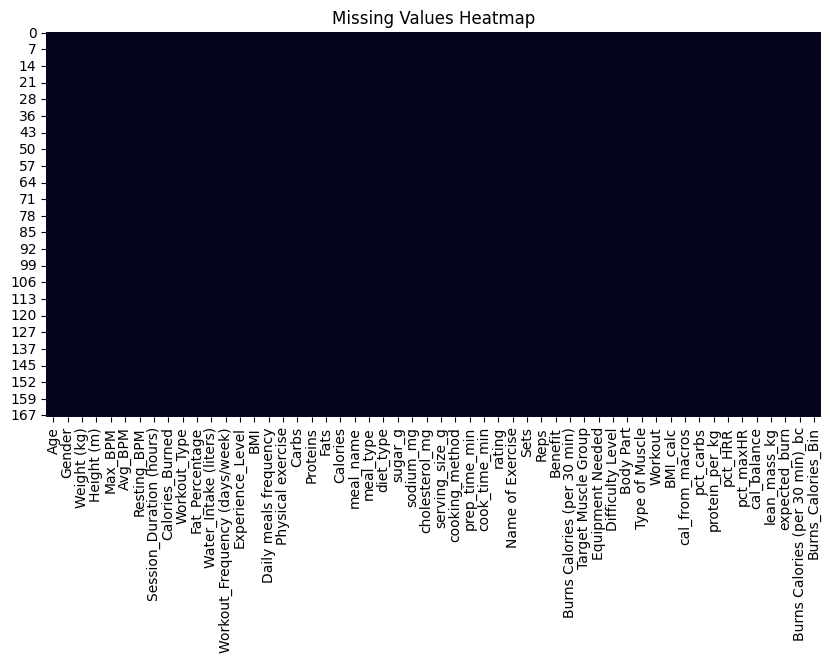

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

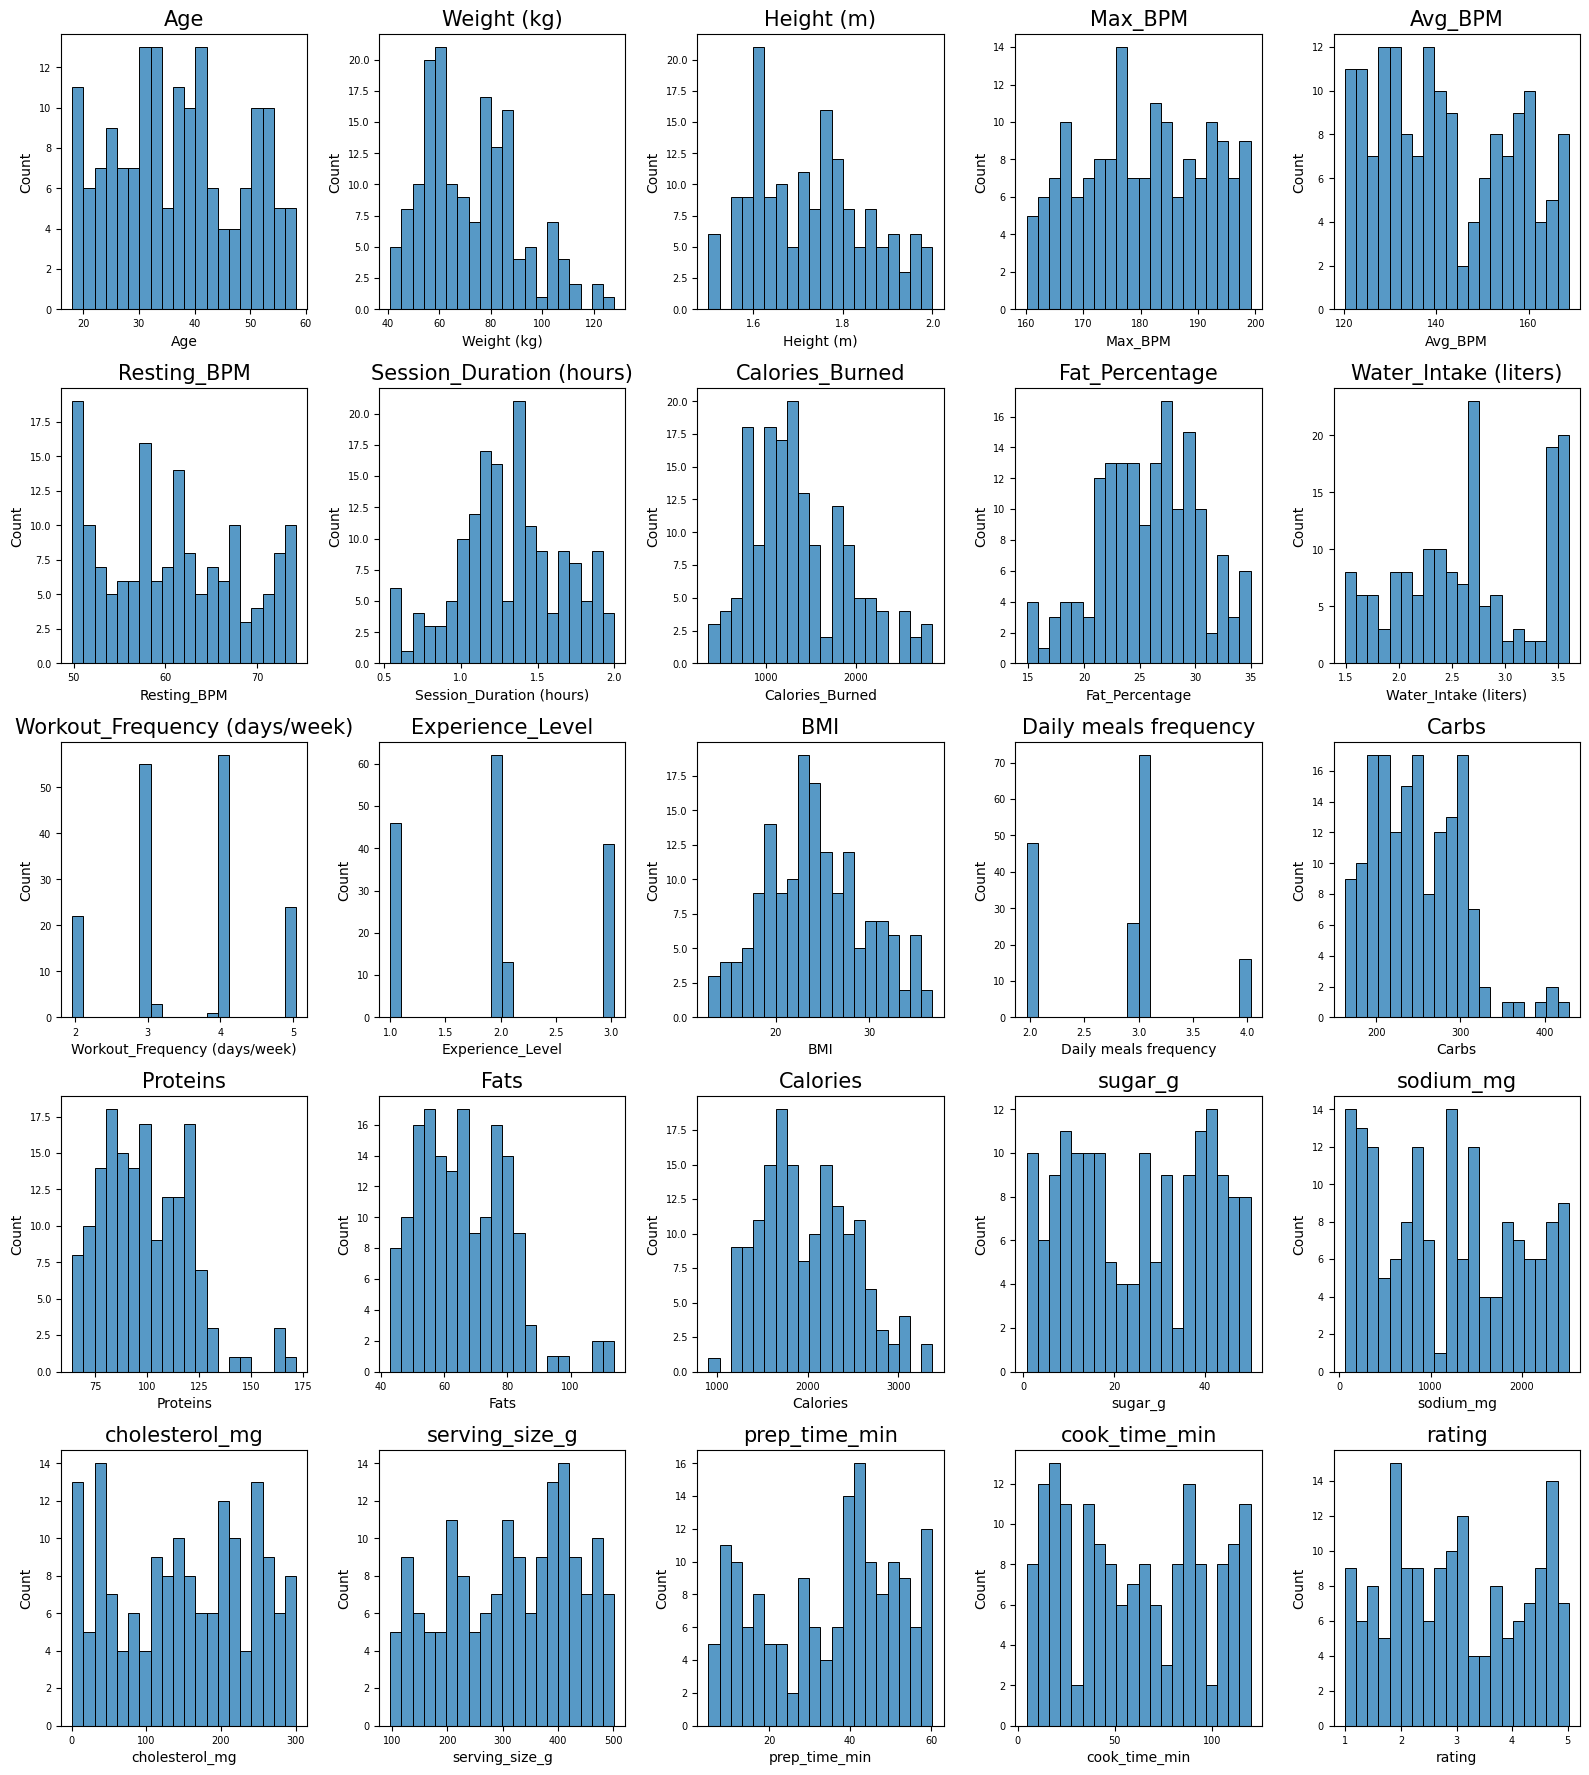

In [6]:
relevant_numeric = [
    "Age",
    "Weight (kg)",
    "Height (m)",
    "Max_BPM",
    "Avg_BPM",
    "Resting_BPM",
    "Session_Duration (hours)",
    "Calories_Burned",
    "Fat_Percentage",
    "Water_Intake (liters)",
    "Workout_Frequency (days/week)",
    "Experience_Level",
    "BMI",
    "Daily meals frequency",
    "Carbs",
    "Proteins",
    "Fats",
    "Calories",
    "sugar_g",
    "sodium_mg",
    "cholesterol_mg",
    "serving_size_g",
    "prep_time_min",
    "cook_time_min",
    "rating"
]

# Filter only available columns
numeric_cols = [col for col in relevant_numeric if col in df.columns]

cols_per_row = 5
n = len(numeric_cols)
rows = (n // cols_per_row) + 1

plt.figure(figsize=(16, 3.5 * rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(df[col], bins=20)
    plt.title(col, fontsize=15)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

plt.tight_layout()
plt.show()

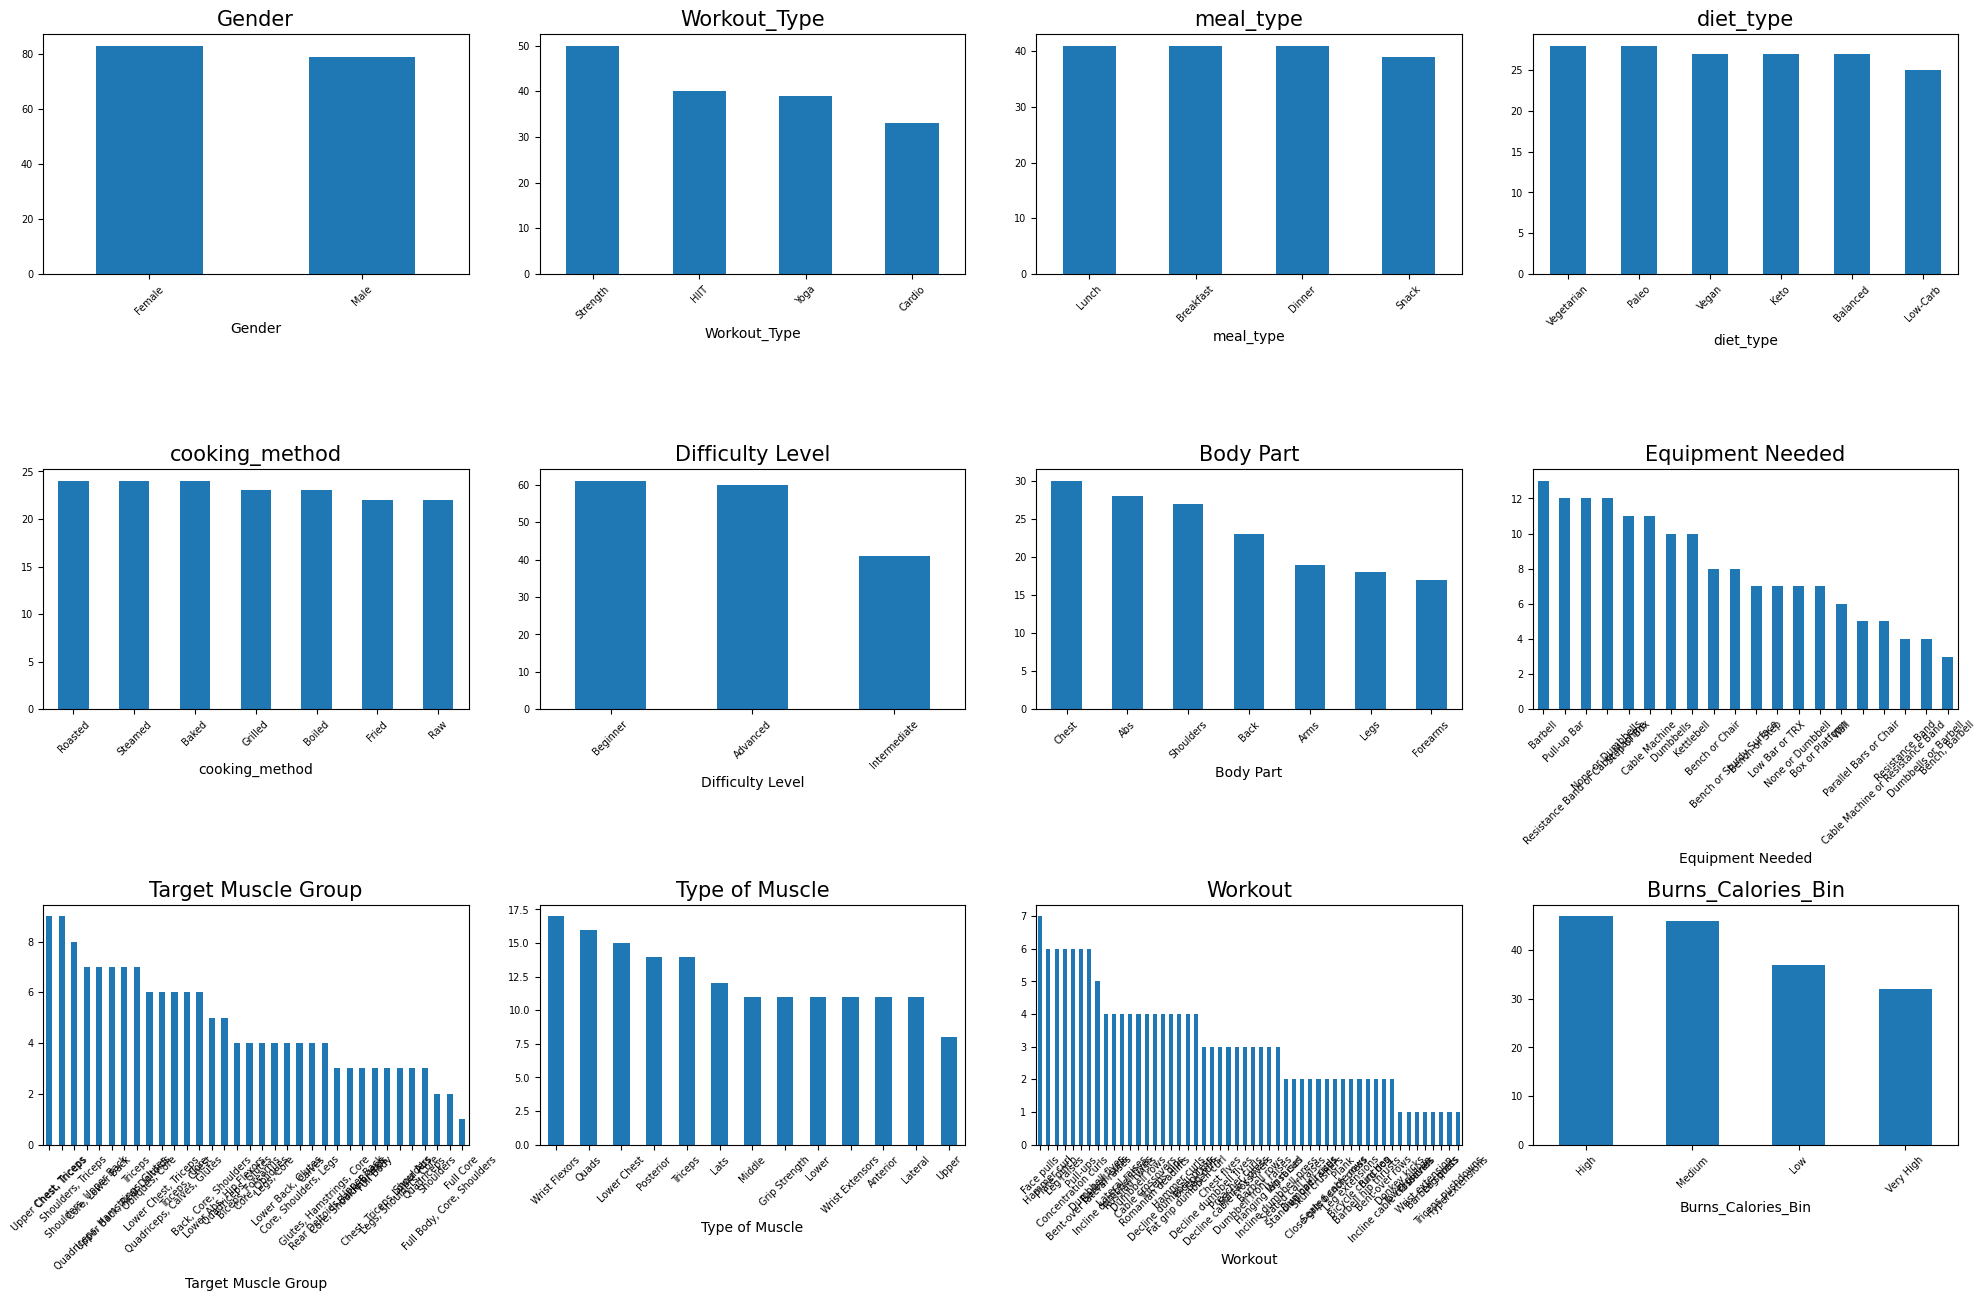

In [7]:
relevant_cats = [
    "Gender",
    "Workout_Type",
    "meal_type",
    "diet_type",
    "cooking_method",
    "Difficulty Level",
    "Body Part",
    "Equipment Needed",
    "Target Muscle Group",
    "Type of Muscle",
    "Workout",
    "Burns_Calories_Bin",
]

cat_cols = [c for c in relevant_cats if c in df.columns]
cols_per_row = 4
n = len(cat_cols)
rows = (n // cols_per_row) + 1

plt.figure(figsize=(20, 4 * rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col, fontsize=15)
    plt.xticks(rotation=45, fontsize=7)
    plt.yticks(fontsize=7)

plt.tight_layout()
plt.show()

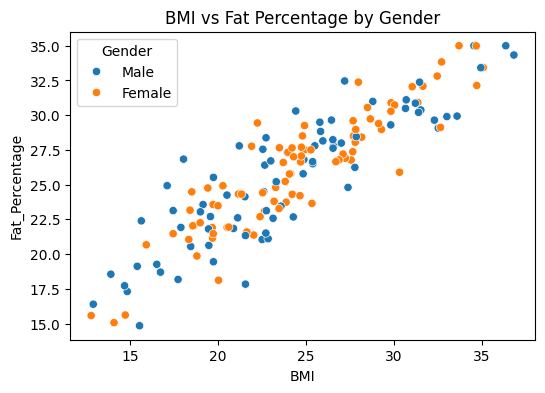

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="BMI", y="Fat_Percentage", hue="Gender")
plt.title("BMI vs Fat Percentage by Gender")
plt.show()

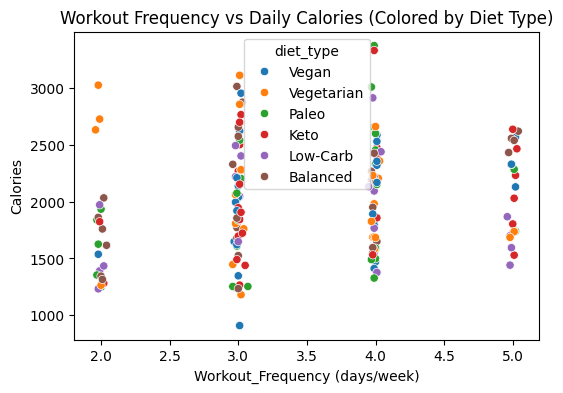

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Workout_Frequency (days/week)", y="Calories", hue="diet_type")
plt.title("Workout Frequency vs Daily Calories (Colored by Diet Type)")
plt.show()

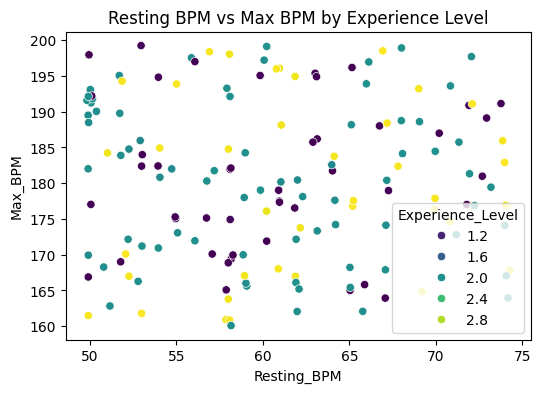

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Resting_BPM", y="Max_BPM", hue="Experience_Level", palette="viridis")
plt.title("Resting BPM vs Max BPM by Experience Level")
plt.show()

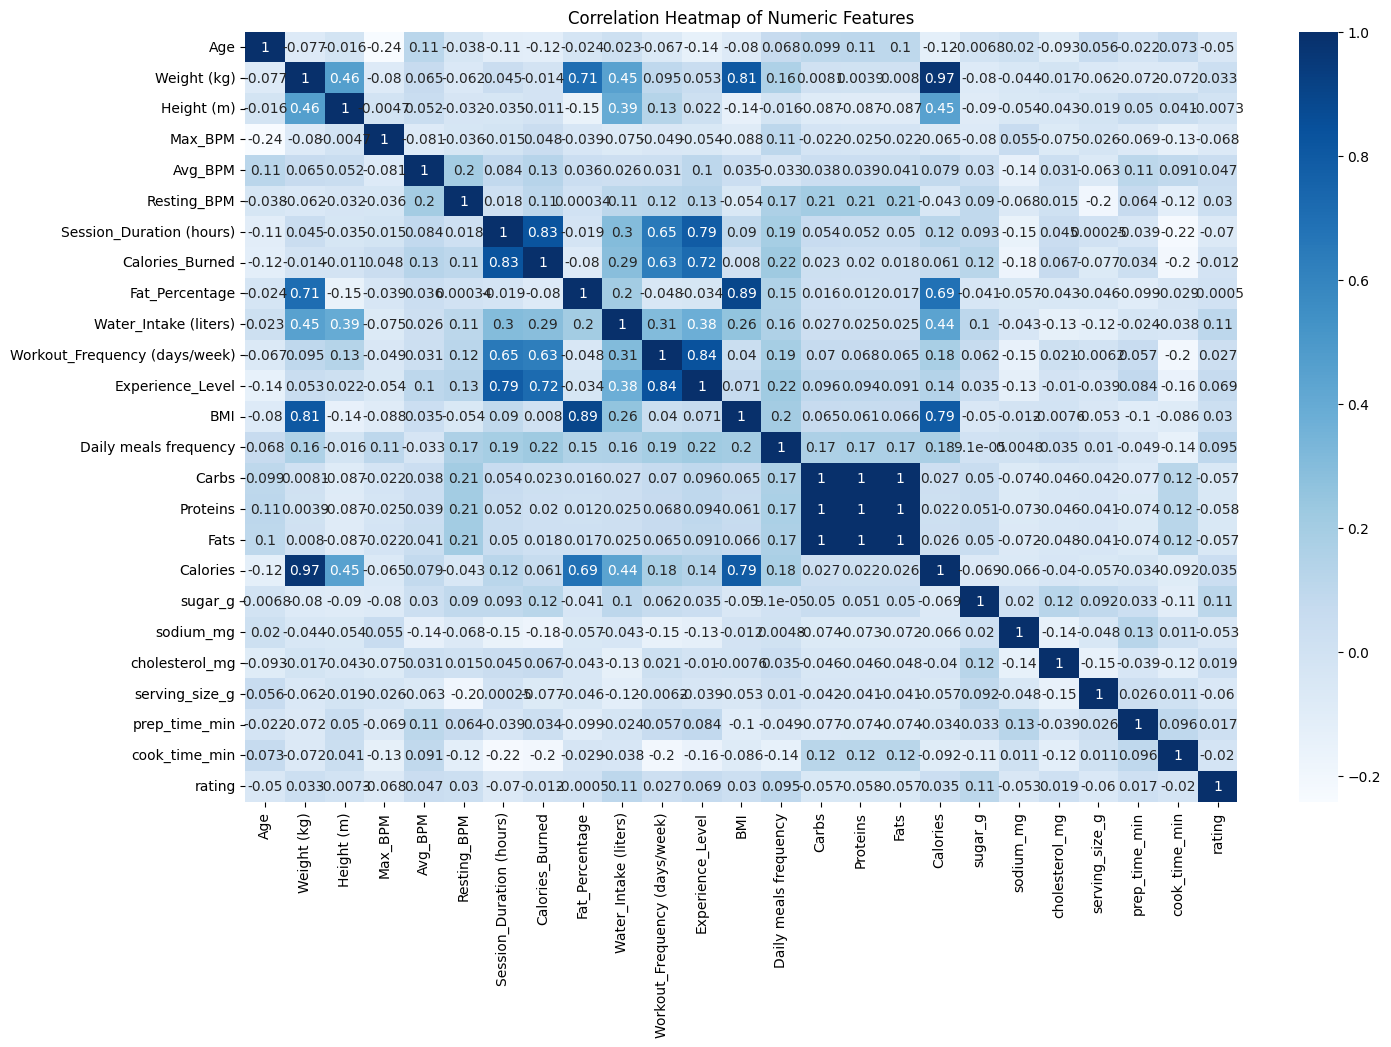

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(df[numeric_cols].corr(), cmap='Blues', annot=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# FEature engineering

In [12]:
# BMI
if "BMI" not in df.columns:
    df["BMI"] = df["Weight (kg)"] / (df["Height (m)"] ** 2)

# Protein per kg body weight
df["protein_per_kg_bw"] = df["Proteins"] / df["Weight (kg)"]

# Activity Index (Workout frequency × session duration)
if "Session_Duration (hours)" in df.columns and "Workout_Frequency (days/week)" in df.columns:
    df["Activity_Index"] = (
        df["Session_Duration (hours)"] * df["Workout_Frequency (days/week)"]
    )

# Modelling


=== Baseline Linear Regression ===
MSE : 0.4510
MAE : 0.5642
R²  : 0.9986

=== Optimised Ridge Regression (alpha=0.1) ===
MSE : 0.4502
MAE : 0.5673
R²  : 0.9986


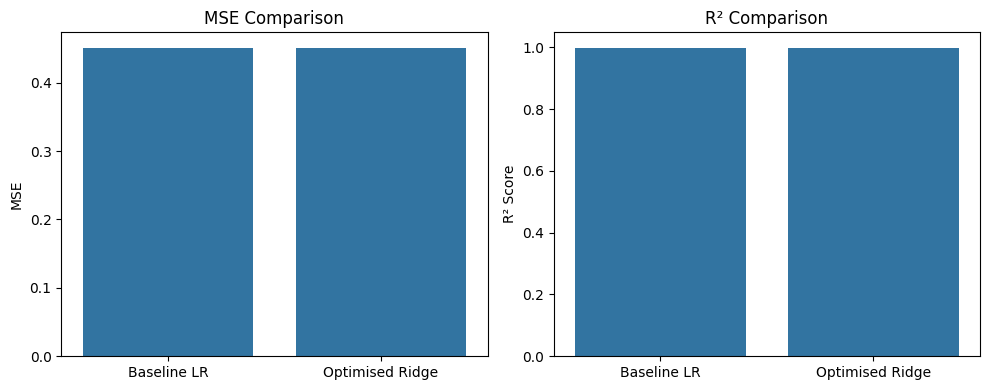

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Helper Functions

def evaluate_model(name, y_true, y_pred):
    """Prints evaluation metrics in a clean unified format."""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2  = r2_score(y_true, y_pred)

    print(f"\n=== {name} ===")
    print(f"MSE : {mse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")

    return mse, mae, r2


def train_model(model, X_train, y_train, X_test, y_test, model_name):
    """Fits model, predicts results, prints metrics."""
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return evaluate_model(model_name, y_test, preds), preds


def plot_comparison(labels, mse_vals, r2_vals):
    """Unified comparison bar plot for multiple models."""
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.barplot(x=labels, y=mse_vals)
    plt.title("MSE Comparison")
    plt.ylabel("MSE")

    plt.subplot(1,2,2)
    sns.barplot(x=labels, y=r2_vals)
    plt.title("R² Comparison")
    plt.ylabel("R² Score")

    plt.tight_layout()
    plt.show()


# Feature Selection

selected_numeric = [
    "Calories", "Carbs", "Fats", "Daily meals frequency",
    "Workout_Frequency (days/week)", "Experience_Level",
    "BMI", "Activity_Index", "protein_per_kg_bw", "Fat_Percentage", "Age", "Water_Intake (liters)"
]

selected_cats = [
    "Gender", "Workout_Type", "diet_type", "cooking_method"
]

leaky_features = [
    "cal_from_macros", "protein_per_kg", "pct_carbs",
    "pct_maxHR", "pct_HRR", "expected_burn",
    "Burns Calories (per 30 min)_bc"
]

df_clean = df.drop(columns=[c for c in leaky_features if c in df.columns])

X = df_clean[selected_numeric + selected_cats]
y = df_clean["Proteins"]


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Preprocessing Pipeline
preprocess = ColumnTransformer(
    [
        ("num", StandardScaler(), selected_numeric),
        ("cat", OneHotEncoder(handle_unknown="ignore"), selected_cats)
    ]
)

# Baseline Linear Regression
baseline_model = Pipeline([
    ("prep", preprocess),
    ("lr", LinearRegression())
])

(base_mse, base_mae, base_r2), y_pred_base = train_model(
    baseline_model, X_train, y_train, X_test, y_test,
    "Baseline Linear Regression"
)

# Ridge Regression With Grid Search
ridge_model = Pipeline([
    ("prep", preprocess),
    ("ridge", Ridge())
])

param_grid = {"ridge__alpha": [0.1, 1, 5, 10, 25, 50, 100]}

grid = GridSearchCV(
    ridge_model, param_grid,
    scoring="neg_mean_squared_error",
    cv=5, n_jobs=-1
)

grid.fit(X_train, y_train)
best_ridge = grid.best_estimator_

(opt_mse, opt_mae, opt_r2), y_pred_opt = train_model(
    best_ridge, X_train, y_train, X_test, y_test,
    f"Optimised Ridge Regression (alpha={grid.best_params_['ridge__alpha']})"
)

# Model Comparison Plot
labels = ["Baseline LR", "Optimised Ridge"]
mse_vals = [base_mse, opt_mse]
r2_vals  = [base_r2,  opt_r2]

plot_comparison(labels, mse_vals, r2_vals)


=== Random Forest Regressor ===
MSE : 0.6922
MAE : 0.6710
R²  : 0.9978

=== Gradient Boosting Regressor ===
MSE : 0.6153
MAE : 0.6370
R²  : 0.9980

=== XGBoost Regressor ===
MSE : 0.9842
MAE : 0.8133
R²  : 0.9969


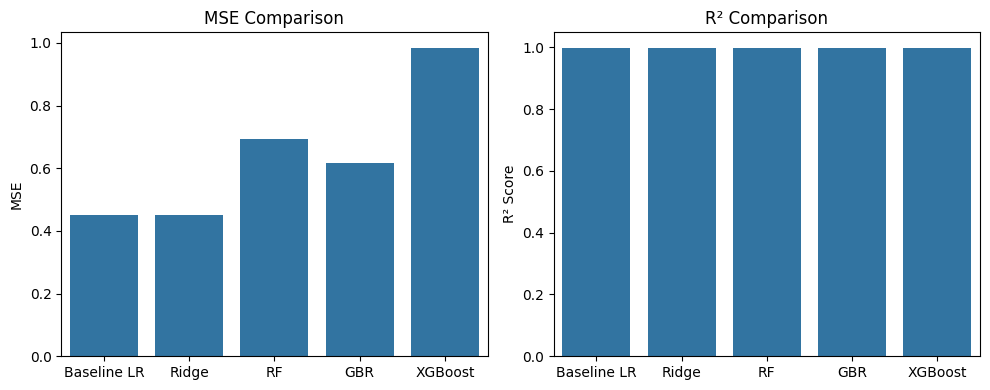

In [14]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# RANDOM FOREST REGRESSOR
rf_model = Pipeline([
    ("prep", preprocess),
    ("rf", RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ))
])

(rf_mse, rf_mae, rf_r2), y_pred_rf = train_model(
    rf_model, X_train, y_train, X_test, y_test,
    "Random Forest Regressor"
)


# GRADIENT BOOSTING REGRESSOR
gbr_model = Pipeline([
    ("prep", preprocess),
    ("gbr", GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        random_state=42
    ))
])

(gbr_mse, gbr_mae, gbr_r2), y_pred_gbr = train_model(
    gbr_model, X_train, y_train, X_test, y_test,
    "Gradient Boosting Regressor"
)


# XGBOOST REGRESSOR
try:
    from xgboost import XGBRegressor

    xgb_model = Pipeline([
        ("prep", preprocess),
        ("xgb", XGBRegressor(
            n_estimators=400,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            objective="reg:squarederror"
        ))
    ])

    (xgb_mse, xgb_mae, xgb_r2), y_pred_xgb = train_model(
        xgb_model, X_train, y_train, X_test, y_test,
        "XGBoost Regressor"
    )

except ImportError:
    print("\n⚠ XGBoost not installed — skipping XGB model.")
    xgb_mse = xgb_r2 = None

labels = ["Baseline LR", "Ridge", "RF", "GBR"]
mse_vals = [base_mse, opt_mse, rf_mse, gbr_mse]
r2_vals  = [base_r2,  opt_r2,  rf_r2,  gbr_r2]

# Add XGB only if available
if xgb_mse is not None:
    labels.append("XGBoost")
    mse_vals.append(xgb_mse)
    r2_vals.append(xgb_r2)

plot_comparison(labels, mse_vals, r2_vals)

# Learning curves

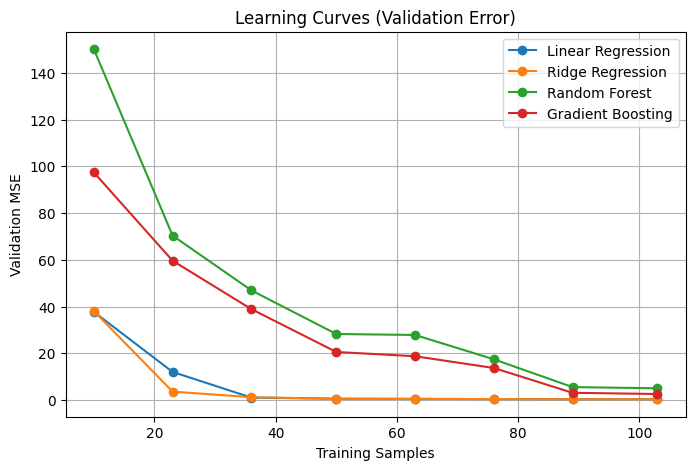

In [15]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curves(models, labels, X, y):
    plt.figure(figsize=(8,5))

    for model, label in zip(models, labels):
        train_sizes, _, val_scores = learning_curve(
            model,
            X,
            y,
            cv=5,
            scoring="neg_mean_squared_error",
            train_sizes=np.linspace(0.1, 1.0, 8),
            n_jobs=-1
        )

        val_mse = -val_scores.mean(axis=1)
        plt.plot(train_sizes, val_mse, marker="o", label=label)

    plt.xlabel("Training Samples")
    plt.ylabel("Validation MSE")
    plt.title("Learning Curves (Validation Error)")
    plt.legend()
    plt.grid(True)
    plt.show()


models = [
    baseline_model,
    best_ridge,
    rf_model,
    gbr_model
]

labels = [
    "Linear Regression",
    "Ridge Regression",
    "Random Forest",
    "Gradient Boosting"
]

plot_learning_curves(models, labels, X_train, y_train)